In [81]:
import json
import os
from collections import Counter
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
os.getcwd()

'C:\\Users\\Chankoo\\Desktop\\GitHub\\BOAZ-projects\\airbnb-NLP'

In [3]:
os.chdir('./../airbnb-data')

In [24]:
review_lst = glob.glob('review_final_*.json')
review_lst

['review_final_busan_70028.json',
 'review_final_daegu_33689.json',
 'review_final_jeju_143957.json',
 'review_final_jeonju_13647.json',
 'review_final_seogwipo_42976.json',
 'review_final_seoul_326990.json']

In [25]:
review = {}
for file in review_lst:
    with open(file,'r',encoding='utf-8') as fp:
        review.update(json.load(fp))

In [36]:
# merge한 데이터 json으로 저장한다
# with open('review_raw.json','w',encoding='utf-8') as fp:
#     json.dump(review,fp,ensure_ascii=False)

In [26]:
len(review.keys())  # 숙소id 개수

28837

In [39]:
list(review.values())[0][0] # 데이터 구조를 보자. 숙소id를 key로, 리뷰들의 리스트를 value로 갖는다

{'collection_tag': None,
 'comments': '친구들이랑 6명이 갔는데\n숙소 위치도 너무 좋고 방도 깨끗해서\n다들 맘에 들어했어요!!\n에어비엔비를  처음 이용해봤는데\n너무 좋아서 다음번에도 이용할것같아요\n해운대해변이랑도 걸어갈수 있고\n연락도 너무 잘됐어요',
 'created_at': '2016-10-08T23:57:42Z',
 'id': 106917581,
 'language': 'ko',
 'localized_date': '2016년 10월',
 'rating': 5,
 'response': '',
 'reviewee': {'deleted': False,
  'first_name': 'Jaewook',
  'host_name': 'Jaewook',
  'id': 38530724,
  'is_superhost': False,
  'picture_url': 'https://a0.muscache.com/im/users/38530724/profile_pic/1436955527/original.jpg?aki_policy=profile_x_medium',
  'profile_path': '/users/show/38530724'},
 'reviewer': {'deleted': False,
  'first_name': 'Joohee',
  'host_name': 'Joohee',
  'id': 96535213,
  'is_superhost': False,
  'picture_url': 'https://a0.muscache.com/im/pictures/32cbca58-85f2-47e5-b09c-a5ead7662304.jpg?aki_policy=profile_x_medium',
  'profile_path': '/users/show/96535213'}}

다행스럽게도 리뷰별로 rating이 있다

In [27]:
ratings = {}
for k,vals in review.items():
    ratings[k] = []
    for val in vals:
        ratings[k].append(val['rating'])

In [28]:
rating_all = []
for vals in ratings.values():
    rating_all.extend(vals)

In [29]:
rating_count = Counter(rating_all)

In [30]:
rating_count # 대부분이 5점

Counter({0: 4447, 1: 1884, 2: 3147, 3: 16776, 4: 104873, 5: 450276})

In [31]:
sum(rating_count.values()) # 전체 rating 개수 == 전체 리뷰 개수

581403

평균구해보자

In [32]:
rate_all=0
for rate,cnt in rating_count.items():
    rate_all += rate*cnt
    

In [33]:
rate_all/sum(rating_count.values()) # 매우높은편 

4.694468380796109

언어분포를 보자

In [34]:
lang = []
for k,rev_lst in review.items():
    for rev in rev_lst:
        lang.append(rev['language'])

한국어와 영어가 대부분이다

NLP를 위해 하나의 언어로 번역필요하다. 영어로 진행할 예정

In [35]:
lang_cnt = Counter(lang)
sorted(lang_cnt.items(),key=lambda kv:kv[1],reverse=True)

[('ko', 276818),
 ('en', 238291),
 ('zh', 18581),
 ('zh-TW', 17942),
 ('zh-CN', 16188),
 ('ja', 6027),
 ('fr', 2359),
 ('ru', 1176),
 ('und', 917),
 ('es', 878),
 ('de', 789),
 ('th', 631),
 ('nl', 140),
 ('it', 108),
 ('id', 90),
 ('pt', 83),
 ('sv', 75),
 ('no', 48),
 ('da', 45),
 ('pl', 37),
 ('fi', 37),
 ('vi', 25),
 ('ms', 22),
 ('tr', 17),
 ('cs', 14),
 ('ca', 13),
 (None, 8),
 ('ar', 6),
 ('bg', 6),
 ('hu', 6),
 ('ro', 5),
 ('sl', 3),
 ('cy', 3),
 ('sq', 2),
 ('tl', 2),
 ('ht', 2),
 ('jw', 1),
 ('gl', 1),
 ('hi', 1),
 ('ceb', 1),
 ('mi', 1),
 ('af', 1),
 ('so', 1),
 ('la', 1),
 ('ky', 1)]

리뷰수를 숙소별로 세보자

In [37]:
review_cnt = {}
for k,v in review.items():
    review_cnt[k] = len(v)

In [48]:
revcnt_cnt = Counter([cnt for cnt in review_cnt.values()])

In [111]:
sorted(revcnt_cnt.items(),)[:30]

[(0, 6530),
 (1, 2772),
 (2, 1738),
 (3, 1205),
 (4, 1004),
 (5, 865),
 (6, 776),
 (7, 643),
 (8, 562),
 (9, 520),
 (10, 466),
 (11, 462),
 (12, 372),
 (13, 397),
 (14, 351),
 (15, 363),
 (16, 324),
 (17, 294),
 (18, 280),
 (19, 286),
 (20, 257),
 (21, 262),
 (22, 270),
 (23, 204),
 (24, 204),
 (25, 216),
 (26, 218),
 (27, 187),
 (28, 172),
 (29, 175)]

In [85]:
labels,counts = zip(*sorted(revcnt_cnt.items(),key=lambda kv:kv[0]))

In [87]:
labels = np.array(labels) # labels: 리뷰 수
counts = np.array(counts) # counts: 해당 리뷰수만큼 리뷰달린 숙소 수

Text(0.5,1,'Review Counts')

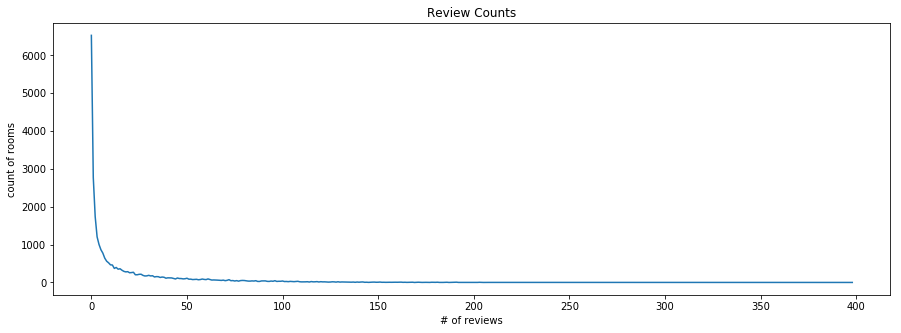

In [97]:
plt.figure(figsize=(15,5))
plt.plot(labels,counts)
plt.xlabel('# of reviews')
plt.ylabel('count of rooms')
plt.title('Review Counts')

추천시스템 구현을 위해서 유저-리뷰 정보가 필요하다

In [99]:
review['10030136'][0]['reviewer']['id'] # user_id이다. 숙소에 달린 리뷰들은 user_id 정보를 담고있다 

96535213

유저를 key, 유저가 쓴 리뷰들의 리스트를 value로 하는 user_rev 딕셔너리를 통해 유저와 리뷰를 매칭하자

In [100]:
user_rev = {}
for listing_id in review.keys():
    for rev in review[listing_id]:
        user_id = str(rev['reviewer']['id'])
        if user_id not in user_rev:
            user_rev[user_id] = []
            user_rev[user_id] += [rev]
        else:
            user_rev[user_id] += [rev]

In [101]:
len(user_rev.keys()) # 리뷰를 쓴 유저의 수

459238

In [102]:
len(user_rev['111507566']) # 111507566 유저가 남긴 리뷰의 수 

1

In [103]:
# 유저당 남긴 리뷰의 개수를 세보자
rev_user_cnt = Counter([len(rev_lst) for rev_lst in user_rev.values()])

In [104]:
rev_user_cnt

Counter({1: 378466,
         2: 57434,
         3: 14714,
         4: 4789,
         5: 1857,
         6: 878,
         7: 415,
         8: 231,
         9: 143,
         10: 80,
         11: 50,
         12: 48,
         13: 31,
         14: 23,
         15: 21,
         16: 17,
         17: 7,
         18: 4,
         19: 6,
         20: 4,
         21: 2,
         22: 1,
         23: 2,
         24: 1,
         25: 1,
         26: 3,
         27: 3,
         28: 1,
         29: 1,
         31: 2,
         32: 1,
         33: 1,
         53: 1})

In [105]:
labels,counts = zip(*sorted(rev_user_cnt.items(),key=lambda kv:kv[0]))

In [106]:
labels = np.array(labels) # labels: 리뷰수
counts = np.array(counts) # counts: 해당 리뷰수만큼 리뷰 남긴 유저 카운트

Text(0.5,1,'Review Counts')

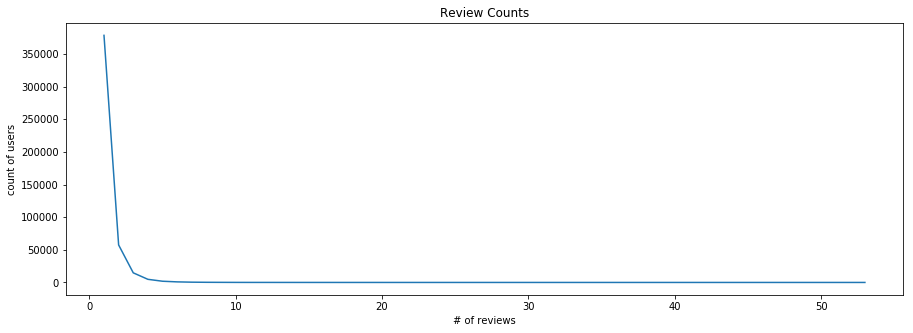

In [107]:
plt.figure(figsize=(15,5))
plt.plot(labels,counts)
plt.xlabel('# of reviews')
plt.ylabel('count of users')
plt.title('Review Counts')